# System tools to herd the dumps into something useful

In [1]:
%pylab nbagg

import os
import re

from topas2numpy import read_ntuple
from datetime import datetime
from pylab import figure, cm
from matplotlib.colors import LogNorm

Populating the interactive namespace from numpy and matplotlib


## Making a new analysis directory

In [12]:
now = datetime.now()

dt_string = now.strftime("%Y-%m-%d-h%Hm%M")

print(dt_string)

os.mkdir(f'analysis/{dt_string}')

2020-08-26-h12m56


## Reformat the dump

In [88]:
!rename -e 's/\d+/sprintf("%04d",$&)/e' -- *.csv
!ls *.csv | grep -o '[0-9][0-9]*' > energies.txt
!cat *.csv | awk 'NR % 6 == 0' > deposition.txt
!rename -e 's/\d+/sprintf("%04d",$&)/e' -- *.phsp
!rename -e 's/\d+/sprintf("%04d",$&)/e' -- *.header

In [4]:
#!cat energies.txt deposition.txt
#!cat deposition.txt

In [13]:
with open('energies.txt') as f:
    energies = np.array([[x for x in line.split()] for line in f]).astype(np.float).flatten()
    
with open('deposition.txt') as f:
    array = np.array([[x for x in line.split()] for line in f]).flatten()
    deposition = array.astype(np.float)

In [14]:
np.save(f'analysis/{dt_string}/EnergyDeposition.npy',[deposition,energies])

<IPython.core.display.Javascript object>


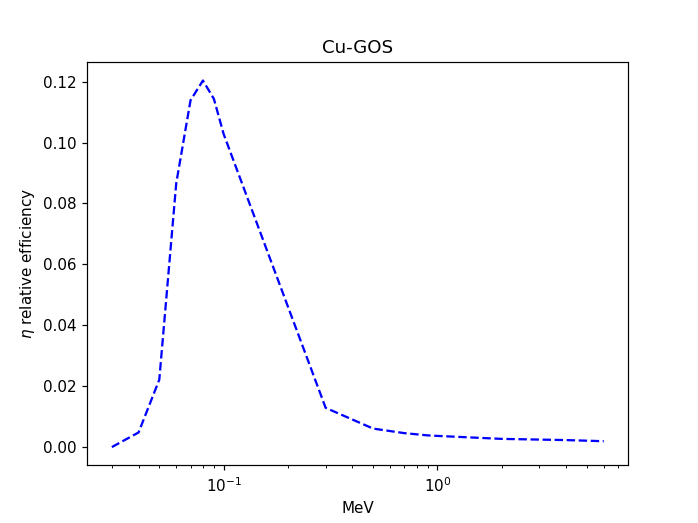

Text(0.5, 1.0, 'Cu-GOS')

In [15]:
plt.figure()
plt.semilogx(energies/1000,deposition/(energies/1000)/3000000,'b--')
plt.xlabel('MeV')                                                       
plt.ylabel('$\eta$ relative efficiency')
# plt.savefig(f'analysis/{dt_string}/EnergyDeposition.png')
plt.title('Cu-GOS')

<IPython.core.display.Javascript object>


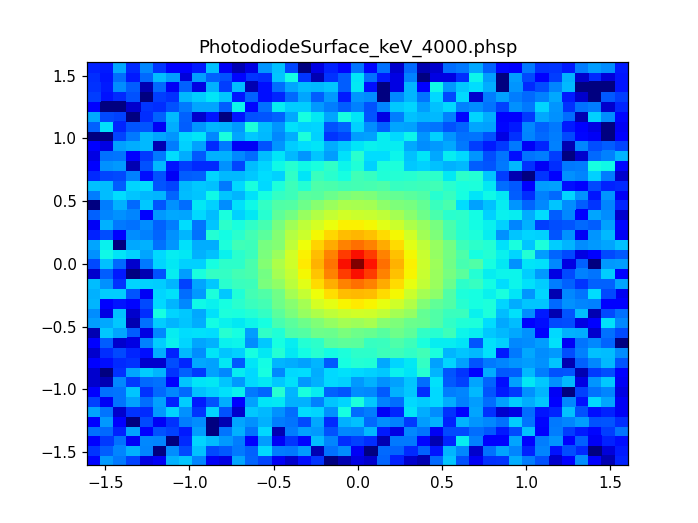

PhotodiodeSurface_keV_0080.phsp
PhotodiodeSurface_keV_1000.phsp
PhotodiodeSurface_keV_0120.phsp
PhotodiodeSurface_keV_2000.phsp
PhotodiodeSurface_keV_6000.phsp
PhotodiodeSurface_keV_0700.phsp
PhotodiodeSurface_keV_0040.phsp
PhotodiodeSurface_keV_0500.phsp
PhotodiodeSurface_keV_0100.phsp
PhotodiodeSurface_keV_0300.phsp
PhotodiodeSurface_keV_0060.phsp
PhotodiodeSurface_keV_0900.phsp
PhotodiodeSurface_keV_0090.phsp
PhotodiodeSurface_keV_0050.phsp
PhotodiodeSurface_keV_0030.phsp
PhotodiodeSurface_keV_0070.phsp
PhotodiodeSurface_keV_4000.phsp


In [16]:
rootdir = "."
regex = re.compile('(.*.phsp$)|(.*rar$)|(.*r01$)')

phase_spaces = []
plt.figure()

# xedges = np.linspace(-1.5876+0.0196,1.5876-0.0196,40) # Changed from 82 JO 2020 07
# yedges = np.linspace(-1.5876+0.0196,1.5876-0.0196,40) # Changed from 40 JO 08


edges_forward = (np.arange(0.0392,21*0.0784,0.0784))

# edges_forward = (np.arange(0.0196,41*0.0392,0.0392))

# edges_forward = (np.arange(0.0168,41*0.0336,0.0336))

edges = np.hstack([-1*edges_forward[-1::-1], edges_forward])

xedges = edges #np.linspace(-2,2,201) # Changed from 82 JO 2020 07
yedges = edges #np.linspace(-2,2,201) # Changed from 40 JO 08

for root, dirs, files in os.walk(rootdir):
    for file in files:
        if regex.match(file):
            
            y = read_ntuple(os.path.join(rootdir,file))
#             xx = [y[kk][0] for kk in range(y.size)]
#             yy = [y[kk][1] for kk in range(y.size)]
            
            h,xs,yx,ima = plt.hist2d(y['Local position X [cm]'],y['Local position Y [cm]'], bins = [xedges,yedges], cmap=cm.jet, norm=LogNorm())
            plt.title(f'{file}')
            plt.savefig(f'analysis/{dt_string}/{file}.png')
            
            np.save(f'analysis/{dt_string}/{file}',h)
            
            print(file)


In [10]:
file

'EnergyDeposition.npy'

In [44]:
edges_forward = (np.arange(0.392,21*0.782,0.782))

edges = np.hstack([-1*edges_forward[-1::-1], edges_forward])

In [76]:
edges

array([-1.3608, -1.3272, -1.2936, -1.26  , -1.2264, -1.1928, -1.1592,
       -1.1256, -1.092 , -1.0584, -1.0248, -0.9912, -0.9576, -0.924 ,
       -0.8904, -0.8568, -0.8232, -0.7896, -0.756 , -0.7224, -0.6888,
       -0.6552, -0.6216, -0.588 , -0.5544, -0.5208, -0.4872, -0.4536,
       -0.42  , -0.3864, -0.3528, -0.3192, -0.2856, -0.252 , -0.2184,
       -0.1848, -0.1512, -0.1176, -0.084 , -0.0504, -0.0168,  0.0168,
        0.0504,  0.084 ,  0.1176,  0.1512,  0.1848,  0.2184,  0.252 ,
        0.2856,  0.3192,  0.3528,  0.3864,  0.42  ,  0.4536,  0.4872,
        0.5208,  0.5544,  0.588 ,  0.6216,  0.6552,  0.6888,  0.7224,
        0.756 ,  0.7896,  0.8232,  0.8568,  0.8904,  0.924 ,  0.9576,
        0.9912,  1.0248,  1.0584,  1.092 ,  1.1256,  1.1592,  1.1928,
        1.2264,  1.26  ,  1.2936,  1.3272,  1.3608])

In [77]:
np.diff(edges)

array([0.0336, 0.0336, 0.0336, 0.0336, 0.0336, 0.0336, 0.0336, 0.0336,
       0.0336, 0.0336, 0.0336, 0.0336, 0.0336, 0.0336, 0.0336, 0.0336,
       0.0336, 0.0336, 0.0336, 0.0336, 0.0336, 0.0336, 0.0336, 0.0336,
       0.0336, 0.0336, 0.0336, 0.0336, 0.0336, 0.0336, 0.0336, 0.0336,
       0.0336, 0.0336, 0.0336, 0.0336, 0.0336, 0.0336, 0.0336, 0.0336,
       0.0336, 0.0336, 0.0336, 0.0336, 0.0336, 0.0336, 0.0336, 0.0336,
       0.0336, 0.0336, 0.0336, 0.0336, 0.0336, 0.0336, 0.0336, 0.0336,
       0.0336, 0.0336, 0.0336, 0.0336, 0.0336, 0.0336, 0.0336, 0.0336,
       0.0336, 0.0336, 0.0336, 0.0336, 0.0336, 0.0336, 0.0336, 0.0336,
       0.0336, 0.0336, 0.0336, 0.0336, 0.0336, 0.0336, 0.0336, 0.0336,
       0.0336])

In [47]:
len(edges)

42

<IPython.core.display.Javascript object>


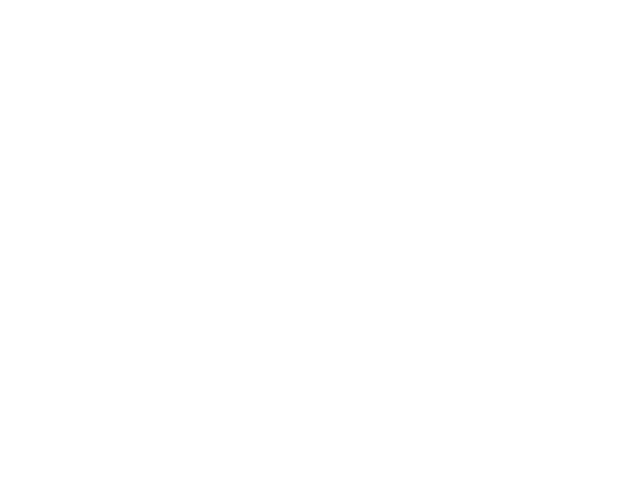

NameError: name 'h' is not defined

In [11]:
plt.figure()
plt.imshow(h)

In [8]:
lsf = h[200,:]

NameError: name 'h' is not defined

<IPython.core.display.Javascript object>


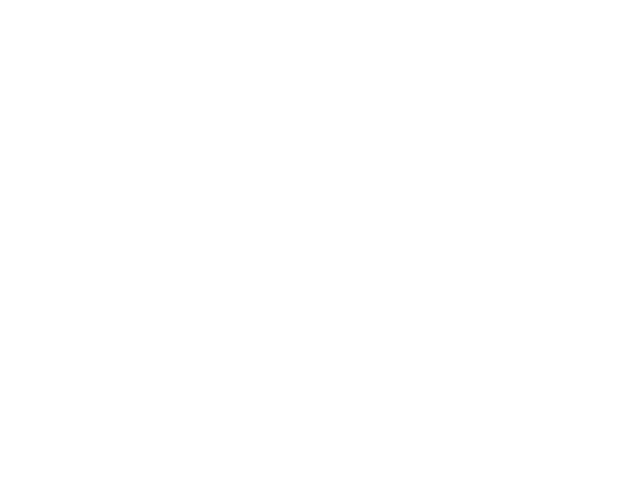

NameError: name 'h' is not defined

In [9]:
plt.figure()
plt.plot(h[200,:])

In [7]:
mtf = np.absolute(np.fft.fft(lsf))
mtf_final = np.fft.fftshift(mtf)

N = len(mtf)

T = 0.01

xf = np.linspace(0.0, 1.0/(2.0*T), int(N/2))

mm = np.argmax(mtf_final)
plt.figure()
plt.plot(mtf_final[mm:]/mtf_final[mm])

NameError: name 'lsf' is not defined

In [ ]:
from PIL import Image
import glob

# Create the frames
frames = []
imgs = sorted(glob.glob("analysis/2020-06-03-h14m33/*.png"))

for i in imgs:
    new_frame = Image.open(i)
    frames.append(new_frame)

# Save into a GIF file that loops forever
frames[0].save('png_to_gif.gif', format='GIF',
               append_images=frames[1:],
               save_all=True,
               duration=300, loop=0)

In [10]:
!cat ~/anaconda3/lib/python3.7/site-packages/topas2numpy/ntuple.py

# -*- coding: utf-8 -*-

# system imports
import re
import os.path

# third-party imports
import numpy as np

re_uint = '\d+'
re_str = '[\S+ \t]+'

binary_old_int_columns = [
    'Particle Type (in PDG Format)',
    'Run ID',
    'Event ID',
    'Track ID',
    'Parent ID',
    'Seed Part 1',
    'Seed Part 2',
    'Seed Part 3',
    'Seed Part 4',
]

limited_col_names = [
    ('Particle Type (sign from z direction)', np.int8),
    ('Energy (MeV) (-ve if new history)', 'f'),
    ('Position X (cm)', 'f'),
    ('Position Y (cm)', 'f'),
    ('Position Z (cm)', 'f'),
    ('Direction Cosine X', 'f'),
    ('Direction Cosine Y', 'f'),
    ('Weight', 'f'),
]


def read_ntuple(filepath):
    root, ext = os.path.splitext(filepath)
    ntuple_path = root + '.phsp'
    header_path = root + '.header'

    file_format, col_names = _sniff_format(header_path)

    if file_format == 'ascii':
        # preserve column names => cannot be viewed as a np.recarray
        # http://docs.scipy.org/doc/numpy-1

In [11]:
file

'PhotodiodeSurface_keV_6000.phsp'

In [12]:
!pwd

/home/xcite/topas/scintillators/Cu-GOS/runs


In [13]:
68372568/2848857

24.0

In [14]:
150398688/6266612

24.0

In [15]:
7437024/24

309876.0

In [36]:
xedges = np.linspace(-1.5876+0.0196,1.5876-0.0196,41)

(max(xedges) - min(xedges))/40

0.0784

In [34]:
0.25*0.784

0.196